In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings("ignore")
import kagglehub

# Download latest version
path = kagglehub.dataset_download("obulisainaren/multi-cancer")

print("Path to dataset files:", path)

100%|██████████| 8.62G/8.62G [02:11<00:00, 70.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3


In [ ]:
import os

# Search for 'multi-cancer' dataset in known base paths
base_paths = ['/', '/mnt', '/content', '.']
found = False

# Define the expected dataset path
data_dir = '/root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3'

# First, check if the specific path exists
if os.path.exists(data_dir):
    print(f"Dataset found at: {data_dir}")
    for root, dirs, files in os.walk(data_dir):
        print(f"Root: {root}")
        print(f"Directories: {dirs}")
        print(f"Files: {files}")
        print("-" * 50)
    found = True
else:
    # If the specific path is not found, search in the base paths
    for base in base_paths:
        print(f"Searching in: {base}")
        if os.path.exists(base):
            for root, dirs, files in os.walk(base):
                if 'multi-cancer' in dirs or any('multi-cancer' in d for d in dirs):
                    found = True
                    print(f"Dataset found at: {root}")
                    break
        if found:
            break

# If not found anywhere
if not found:
    print("Dataset 'multi-cancer' not found. Ensure it is correctly downloaded or mounted.")


Dataset found at: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3
Root: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3
Directories: ['Multi Cancer']
Files: ['README.md']
--------------------------------------------------
Root: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer
Directories: ['Multi Cancer']
Files: []
--------------------------------------------------
Root: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer
Directories: ['Kidney Cancer', 'Oral Cancer', 'Lung and Colon Cancer', 'Breast Cancer', 'Cervical Cancer', 'Lymphoma', 'ALL', 'Brain Cancer']
Files: []
--------------------------------------------------
Root: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Kidney Cancer
Directories: ['kidney_normal', 'kidney_tumor']
Files: []
--------------------------------------------------
Root: /root/.cache/kaggle

In [ ]:
import os
import pandas as pd

# Base directory of the dataset
data_dir = '/root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer'

filepath = []
labels = []

# Walk through all folders in the dataset
for cancer_type in os.listdir(data_dir):  # Top-level folders like 'Brain Cancer', 'Breast Cancer', etc.
    cancer_type_path = os.path.join(data_dir, cancer_type)

    # Filter to focus on 'Brain Cancer' folder
    if cancer_type == 'Brain Cancer' and os.path.isdir(cancer_type_path):  # Check if the folder exists
        print(f"Found Brain Cancer Folder: {cancer_type_path}")  # Print the top-level Brain Cancer folder

        for subfolder in os.listdir(cancer_type_path):  # Subfolders under Brain Cancer
            subfolder_path = os.path.join(cancer_type_path, subfolder)

            if os.path.isdir(subfolder_path):
                print(f"  Found Subfolder: {subfolder_path}")  # Print each subfolder

                # Check if there are image files in the subfolder
                image_files = [img for img in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, img))]

                if image_files:
                    for image in image_files:  # Image files in each subfolder
                        image_path = os.path.join(subfolder_path, image)

                        filepath.append(image_path)
                        labels.append(subfolder)  # Use the subfolder name as the label
                        # print(f"    Adding Image: {image_path}")  # Debugging: Show which image is being added
                else:
                    print(f"    No image files found in subfolder: {subfolder_path}")

# Create a DataFrame
df = pd.DataFrame({'filepath': filepath, 'labels': labels})

# Display the first few rows of the DataFrame
print(df.head())

# Check for empty DataFrame
if df.empty:
    print("No data was collected. Verify folder structure and paths.")
else:
    print("Data successfully collected for Brain Cancer!")

Found Brain Cancer Folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Brain Cancer
  Found Subfolder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Brain Cancer/brain_tumor
  Found Subfolder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Brain Cancer/brain_menin
  Found Subfolder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Brain Cancer/brain_glioma
                                            filepath       labels
0  /root/.cache/kagglehub/datasets/obulisainaren/...  brain_tumor
1  /root/.cache/kagglehub/datasets/obulisainaren/...  brain_tumor
2  /root/.cache/kagglehub/datasets/obulisainaren/...  brain_tumor
3  /root/.cache/kagglehub/datasets/obulisainaren/...  brain_tumor
4  /root/.cache/kagglehub/datasets/obulisainaren/...  brain_tumor
Data successfully collected for Brain Cancer!


In [ ]:
# Count the occurrences of each unique label in the 'labels' column and reset index
count = df['labels'].value_counts().reset_index()
# Rename the columns to make it clear that 'labels' are the unique classes and 'count' is the frequency
count.columns = ['labels', 'count']

# Create a bar chart using Plotly to visualize the frequency distribution of labels
count_fig = px.bar(count, x='labels', y='count', title='count of labels', text_auto=True)
# Display the bar chart with the count of each label, showing the count on top of each bar
count_fig.show()

In [ ]:
# Split the dataset into training, validation, and test sets while maintaining class distribution
strat = df['labels']  # Extract the 'labels' column for stratified splitting
train_df, dummy_df = train_test_split(df, test_size=0.3, random_state=42, stratify=strat)  # Split into 70% training and 30% dummy (validation+test)
strate = dummy_df['labels']  # Extract labels for the remaining data for further stratified splitting
valid_df, test_df = train_test_split(dummy_df, test_size=0.5, random_state=42, stratify=strate)  # Split the 30% into 50% validation and 50% test (15% each)


In [ ]:
# Print the shape of each dataset (train, validation, test)
print(train_df.shape)  # Training set size
print(valid_df.shape)  # Validation set size
print(test_df.shape)   # Test set size

(10500, 2)
(2250, 2)
(2250, 2)


In [ ]:
# Count the labels in the validation dataset and visualize the class distribution
count_valid = valid_df['labels'].value_counts().reset_index()  # Get count of each class in the validation set
count_valid.columns = ['labels', 'count']  # Rename columns for clarity
fig = px.bar(count_valid, x='labels', y='count', title='Count of Labels per valid_df', text_auto=True)  # Plot the class distribution for validation set
fig.show()  # Display the plot


In [ ]:
# Count the labels in the test dataset and visualize the class distribution
count_test = test_df['labels'].value_counts().reset_index()  # Get count of each class in the test set
count_test.columns = ['labels', 'count']  # Rename columns for clarity
fig = px.bar(count_test, x='labels', y='count', title='Count of Labels per test_df', text_auto=True)  # Plot the class distribution for test set
fig.show()  # Display the plot

In [ ]:
# Set the batch size, image size, and channels for image data
batch_size = 64  # Number of samples per batch
img_size = (224, 224)  # Desired image size (224x224)
channels = 3  # RGB channels (3 channels for colored images)
img_shape = (img_size[0], img_size[1], channels)  # Final image shape for input to the model

# Data augmentation setup to generate augmented images during training
tr_gen = ImageDataGenerator(
    rotation_range=40,        # Randomly rotate images within a range of 40 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of their width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of their height
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in any missing pixels after transformations
)

# Generating training data from the DataFrame with image paths and corresponding labels
train_gen = tr_gen.flow_from_dataframe(
    train_df,                  # Dataframe containing file paths and labels
    x_col='filepath',          # Column with image file paths
    y_col='labels',            # Column with image labels
    target_size=img_size,      # Resizing images to the desired size
    class_mode='categorical',  # Labels are categorical (for multi-class classification)
    color_mode='rgb',          # Using RGB color images
    shuffle=True,              # Shuffle the data to ensure randomness
    batch_size=batch_size      # Specify batch size for training
)

# Generating validation data in a similar way
valid_gen = tr_gen.flow_from_dataframe(
    valid_df,                  # Validation dataframe
    x_col='filepath',          # File paths for validation images
    y_col='labels',            # Validation labels
    target_size=img_size,      # Resize validation images
    class_mode='categorical',  # Categorical labels
    color_mode='rgb',          # RGB images for validation
    shuffle=True,              # Shuffle the validation data
    batch_size=batch_size      # Batch size for validation
)

# Generating test data (without shuffling to preserve order)
test_gen = tr_gen.flow_from_dataframe(
    test_df,                   # Test dataframe
    x_col='filepath',          # Test image file paths
    y_col='labels',            # Test image labels
    target_size=img_size,      # Resize test images
    class_mode='categorical',  # Categorical labels
    color_mode='rgb',          # RGB color mode
    shuffle=False,             # Don't shuffle for test data (important for evaluation)
    batch_size=batch_size      # Batch size for test data
)

Found 10500 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.


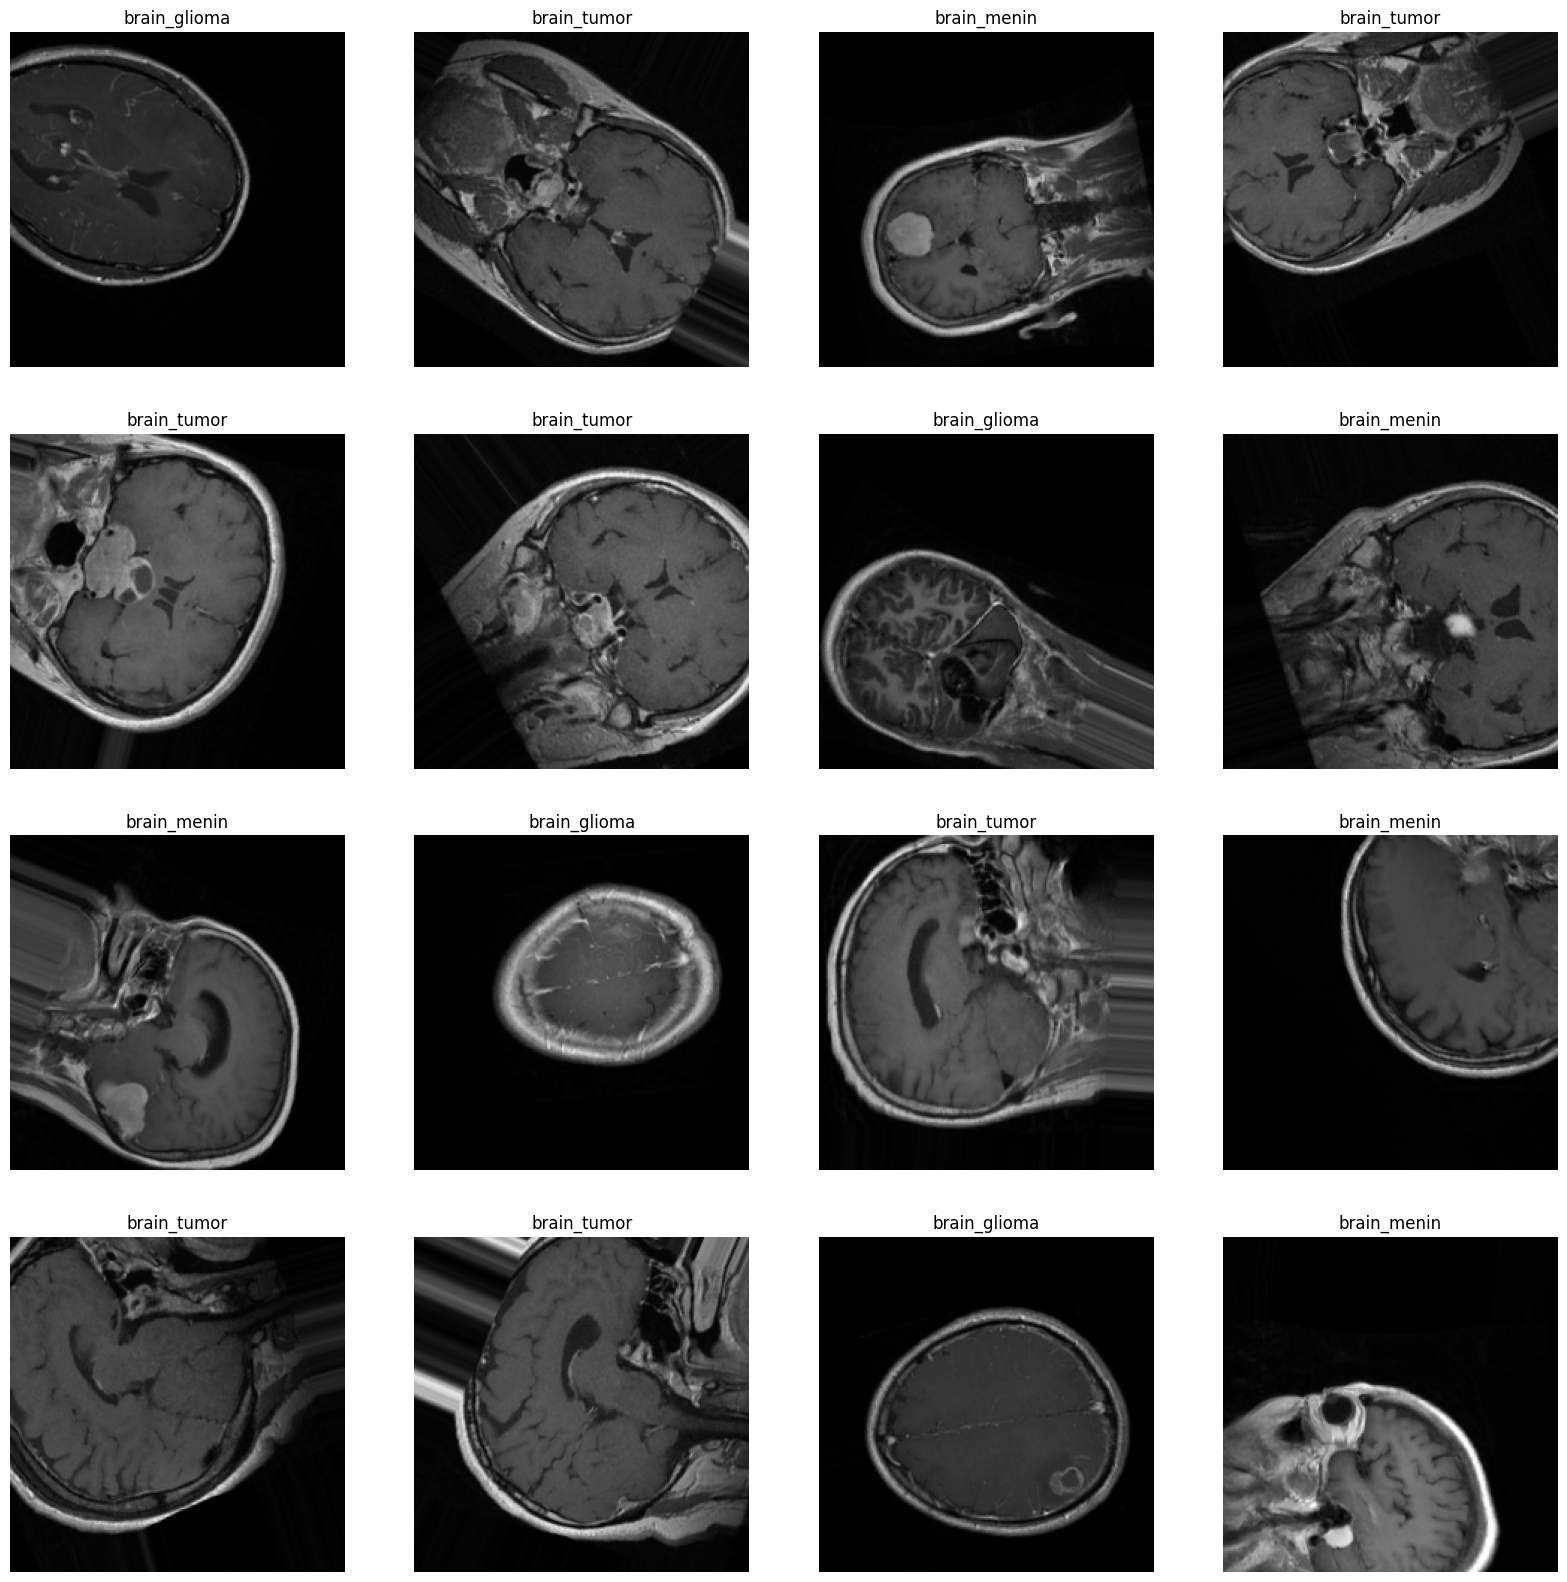

In [ ]:
# Extract the class indices from the training generator
g_dict = train_gen.class_indices  # Get the class indices (mapping between label and class)
classes = list(g_dict.keys())     # Get the list of class names
images, labels = next(train_gen)  # Fetch the next batch of images and labels

# Display a grid of 16 images with their corresponding labels
plt.figure(figsize=(20, 20))  # Set the figure size for the grid of images
for i in range(16):           # Loop to display 16 images
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid for the images
    image = images[i] / 255    # Normalize the image (scaling pixel values to [0, 1])
    plt.imshow(image)          # Display the image
    index = np.argmax(labels[i])  # Get the index of the true label
    class_name = classes[index]   # Map index to class name
    plt.title(class_name, color='black', fontsize=12)  # Set the title to the class name
    plt.axis('off')            # Turn off axis for a clean display
plt.show()  # Show the image grid

In [ ]:
# Load EfficientNetB3 pre-trained on ImageNet without the top layer (for transfer learning)
base_model = keras.applications.EfficientNetB3(
    include_top=False,   # Exclude the top (classification) layer
    weights="imagenet",  # Use pre-trained weights from ImageNet
    input_shape=(128, 128, 3)  # Specify input image shape
)

# Build the custom model by adding a Flatten layer and Dense layers on top of the pre-trained base model
model = Sequential([
    base_model,  # Pre-trained EfficientNetB3 base model
    Flatten(),  # Flatten the 3D output to 1D vector (for dense layers)
    Dense(256, activation='relu'),  # Fully connected layer with 256 neurons
    Dropout(0.25),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Fully connected layer with 64 neurons
    Dense(3, activation='softmax')  # Output layer with 3 classes for multi-class classification
])

# Compile the model using Adamax optimizer with a learning rate of 0.001 and categorical crossentropy loss
model.compile(
    Adamax(learning_rate=0.001),  # Adamax optimizer with specified learning rate
    loss='categorical_crossentropy',  # Multi-class classification loss function
    metrics=['accuracy']  # Track accuracy during training
)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Install TensorFlow again
!pip install tensorflow

# Import necessary libraries for image data preprocessing and augmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data augmentation to apply random transformations during training to improve generalization
train_datagen = ImageDataGenerator(
    rotation_range=40,        # Randomly rotate images within 40 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in any missing pixels after transformations
)

# Create a data generator to load images from a directory with the specified augmentations
train_gen = train_datagen.flow_from_directory(
    '/root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Brain Cancer',  # Path to the Brain Cancer dataset folder
    target_size=(224, 224),  # Resize all images to 224x224
    batch_size=32,           # Batch size for training
    class_mode='categorical'  # Labels are categorical (for multi-class classification)
)

Found 15000 images belonging to 3 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Input(shape=(150, 150, 3)),  # Define the input shape as the first layer (150x150 images with 3 channels)
    Conv2D(32, (3, 3), activation='relu'),  # First convolutional layer with 32 filters and 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer to reduce spatial dimensions by half
    Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer with 64 filters and 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Another max pooling layer to reduce spatial dimensions
    Flatten(),  # Flatten the 2D output to 1D before passing it to dense layers
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dropout(0.5),  # Dropout to reduce overfitting by randomly setting 50% of neurons to 0
    Dense(3, activation='softmax')  # Output layer with 3 neurons for multi-class classification (adjust based on number of classes)
])

# Compile the model using Adam optimizer, categorical crossentropy loss (for multi-class classification), and accuracy metric
model.compile(
    optimizer=Adam(),  # Adam optimizer, a good default choice for training neural networks
    loss='categorical_crossentropy',  # Multi-class classification loss function
    metrics=['accuracy']  # Track accuracy as the performance metric
)

import os

# Base directory where your dataset is stored
data_dir = '/root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer'

# List all directories in the main dataset folder (e.g., 'brain_glioma', 'brain_menin', etc.)
print("Directories in dataset:", os.listdir(data_dir))

# Further list subdirectories under the main dataset folder (each cancer type will be in its own folder)
for cancer_type in os.listdir(data_dir):
    cancer_type_path = os.path.join(data_dir, cancer_type)
    if os.path.isdir(cancer_type_path):
        print(f"Found folder: {cancer_type_path}")
        print("Subfolders:", os.listdir(cancer_type_path))


Directories in dataset: ['Kidney Cancer', 'Oral Cancer', 'Lung and Colon Cancer', 'Breast Cancer', 'Cervical Cancer', 'Lymphoma', 'ALL', 'Brain Cancer']
Found folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Kidney Cancer
Subfolders: ['kidney_normal', 'kidney_tumor']
Found folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Oral Cancer
Subfolders: ['oral_normal', 'oral_scc']
Found folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Lung and Colon Cancer
Subfolders: ['colon_bnt', 'lung_scc', 'colon_aca', 'lung_aca', 'lung_bnt']
Found folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Breast Cancer
Subfolders: ['breast_malignant', 'breast_benign']
Found folder: /root/.cache/kagglehub/datasets/obulisainaren/multi-cancer/versions/3/Multi Cancer/Multi Cancer/Cervical Cancer
Subfolde

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Define the model architecture using transfer learning with EfficientNetB3 as the base model
model = Sequential([
    base_model,  # Pre-trained base model (EfficientNetB3 without the top layer)
    GlobalAveragePooling2D(),  # Global average pooling reduces the output size to (None, 1536), reduces computation complexity
    Dense(256, activation='relu'),  # Fully connected layer with 256 units and ReLU activation
    Dropout(0.25),  # Dropout layer to prevent overfitting by randomly setting 25% of inputs to 0
    Dense(64, activation='relu'),  # Fully connected layer with 64 units and ReLU activation
    Dense(3, activation='softmax')  # Output layer with 3 units for multi-class classification (softmax activation for probabilities)
])

In [ ]:
from tensorflow.keras.layers import Flatten, BatchNormalization

model = Sequential([
    base_model,  # The pre-trained base model (e.g., VGG16, ResNet50, etc.)

    Flatten(),  # Converts (None, 7, 7, 1536) to (None, 75264)

    BatchNormalization(),  # Add batch normalization after flattening
    Dense(256, activation='relu'),
    Dropout(0.4),  # Increase dropout rate to 0.4 for better regularization

    BatchNormalization(),  # Add batch normalization before the next dense layer
    Dense(128, activation='relu'),  # Increased the number of units for more capacity

    Dropout(0.3),  # Added another dropout layer to prevent overfitting
    Dense(3, activation='softmax')  # Final softmax layer for 3 classes
])


In [ ]:
from tensorflow.keras.layers import Flatten

# Define the model architecture using a pre-trained base model (EfficientNetB3, for example)
model = Sequential([
    base_model,  # The pre-trained base model (e.g., EfficientNetB3), used as a feature extractor
    Flatten(),  # Flatten layer to convert the 3D output (None, 7, 7, 1536) into a 1D vector (None, 75264)
    Dense(256, activation='relu'),  # Fully connected layer with 256 units and ReLU activation function
    Dropout(0.25),  # Dropout layer to prevent overfitting by randomly setting 25% of inputs to 0
    Dense(64, activation='relu'),  # Fully connected layer with 64 units and ReLU activation function
    Dense(3, activation='softmax')  # Output layer with 3 units (for 3 classes) and softmax activation for multi-class classification
])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
from sklearn.metrics import precision_score, recall_score, f1_score

model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'precision', 'recall', 'AUC'])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import mixed_precision  # Updated import

# Set a manageable batch size and configure early stopping
batch_size = 32  # Use a moderate batch size
epochs = 3  # Limited epochs to avoid unnecessary long training
patience = 5  # Early stopping patience

# Build the model by calling it with a sample input
model(tf.random.uniform((1, 128, 128, 3)))

# Enable Mixed Precision Training if GPU is supported
policy = mixed_precision.Policy('mixed_float16')  # Use the updated policy class
mixed_precision.set_global_policy(policy)

# Setup EarlyStopping to prevent overfitting and reduce training time
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 'patience' epochs without improvement
    restore_best_weights=True
)

# Save the best model during training to prevent data loss
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Data Augmentation setup with ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,        # Randomly rotate images within 40 degrees
    width_shift_range=0.2,    # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Shift images vertically by up to 20% of the height
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in any missing pixels after transformations
)

# Train, validation, and test data generators
train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='labels', target_size=(128, 128),
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size
)

valid_gen = datagen.flow_from_dataframe(
    valid_df, x_col='filepath', y_col='labels', target_size=(128, 128),
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filepath', y_col='labels', target_size=(128, 128),
    class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size
)

# Build the model by calling it with a sample input
model(tf.random.uniform((1, 128, 128, 3)))

# Model training with early stopping and checkpointing
history = model.fit(
    train_gen,
    epochs=6,  # For more acurate answer make it 100 - More the epoch, more the accuracy | Limiting it to 6 coz of time constrains
    steps_per_epoch=100,
    validation_data=valid_gen,
    shuffle=True,  # Shuffle data during training
    callbacks=[early_stopping, checkpoint]  # Use callbacks to monitor and save best model
)

# Optionally, print the model summary to inspect the layers and parameters
model.summary()


Found 10500 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Found 2250 validated image filenames belonging to 3 classes.
Epoch 1/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 717s 7s/step - accuracy: 0.9464 - loss: 0.1847 - val_accuracy: 0.7364 - val_loss: 0.7907
Epoch 2/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 751s 8s/step - accuracy: 0.9232 - loss: 0.2254 - val_accuracy: 0.9578 - val_loss: 0.1635
Epoch 3/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 698s 7s/step - accuracy: 0.9578 - loss: 0.1362 - val_accuracy: 0.9538 - val_loss: 0.1129
Epoch 4/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 272s 3s/step - accuracy: 0.9605 - loss: 0.1167 - val_accuracy: 0.8009 - val_loss: 0.6756
Epoch 5/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 746s 7s/step - accuracy: 0.9604 - loss: 0.1183 - val_accuracy: 0.9293 - val_loss: 0.2817
Epoch 6/6
100/100 ━━━━━━━━━━━━━━━━━━━━ 702s 7s/step - accuracy: 0.9583 - loss: 0.1182 - val_accuracy: 0.9627 - val_loss: 0.1198


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 4, 4, 1536)          │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 24576)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │       6,291,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,101,066 (194.94 MB)

 Trainable params: 17,004,587 (64.87 MB)

 Non-trainable params: 87,303 (341.03 KB)

 Optimizer params: 34,009,176 (129.73 MB)

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9621 - loss: 0.1022
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9488 - loss: 0.1335
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9539 - loss: 0.1086
Train Loss:  0.09722768515348434
Train Accuracy:  0.9593750238418579
--------------------
Valid Loss:  0.12222848832607269
Valid Accuracy:  0.9552083611488342
--------------------
Test Loss:  0.1067129522562027
Test Accuracy:  0.9541666507720947


In [ ]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step


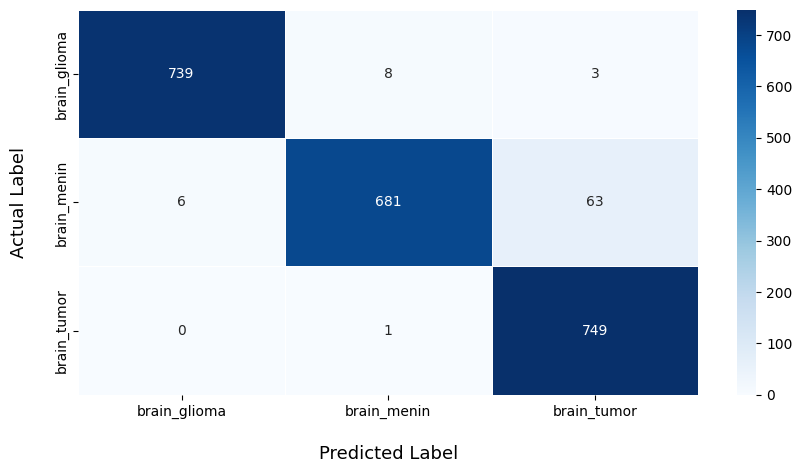

In [ ]:
# Set the figure size for the confusion matrix plot
plt.figure(figsize=(10,5))

# Generate the confusion matrix using the actual labels and predicted labels
cm = confusion_matrix(test_gen.classes, y_pred)

# Define the class labels (as keys from the class indices dictionary)
labels = list(test_gen.class_indices.keys())

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d",  # Annotates the matrix with actual counts (fmt="d" for integers)
            xticklabels=labels, yticklabels=labels,  # Set the x and y tick labels to the class labels
            cmap="Blues",  # Use a blue color palette
            linewidths=.5)  # Set linewidth for better clarity between matrix cells

# Label the x-axis as "Predicted Label"
plt.xlabel('\nPredicted Label', fontsize=13)

# Label the y-axis as "Actual Label"
plt.ylabel('Actual Label\n', fontsize=13)

# Show the plot
plt.show()

In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

brain_glioma       0.99      0.99      0.99       750
 brain_menin       0.99      0.91      0.95       750
 brain_tumor       0.92      1.00      0.96       750

    accuracy                           0.96      2250
   macro avg       0.97      0.96      0.96      2250
weighted avg       0.97      0.96      0.96      2250



In [ ]:
joblib.dump(model,"Brain tumor classification1.pkl")

['Brain tumor classification1.pkl']

In [ ]:
model.save('Brain tumor classification1.keras')

In [ ]:
!ls

 best_model.keras		     'Brain tumor classification1.pkl'
'Brain tumor classification1.keras'   sample_data
